In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
train_filename = list(uploadedData)[0]


rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving train_df_csv to train_df_csv


In [4]:
uploadedData = files.upload()
test_filename = list(uploadedData)[0]

Saving test_df_csv to test_df_csv


In [5]:
train = pd.read_csv(train_filename)
test = pd.read_csv(test_filename)

# **Part 1: Basic model selection with k-Nearest Neighbors**

# Visualization and basic analysis

**Task:** Create a temporary DataFrame containing only PCR_01 and PCR_02.

In [6]:
temp_df = pd.DataFrame(train[["PCR_01","PCR_02","spread","risk"]])

In [7]:
sns.reset_orig()

(-1.3, 1.3)

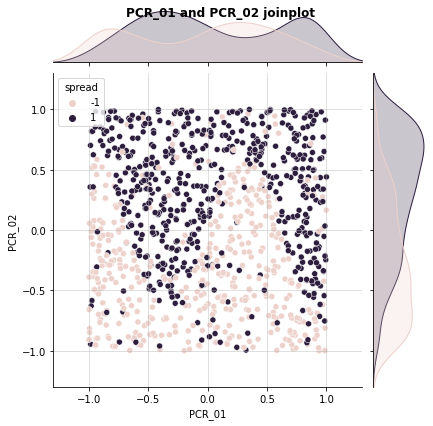

In [8]:
graph = sns.jointplot(data = temp_df , x = temp_df.PCR_01, y = temp_df.PCR_02, hue="spread",)
graph.ax_joint.grid(alpha=0.5)
graph.fig.suptitle("PCR_01 and PCR_02 joinplot", fontweight ="bold")
graph.ax_marg_x.set_xlim(-1.3, 1.3)
graph.ax_marg_y.set_ylim(-1.3, 1.3)

In [9]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

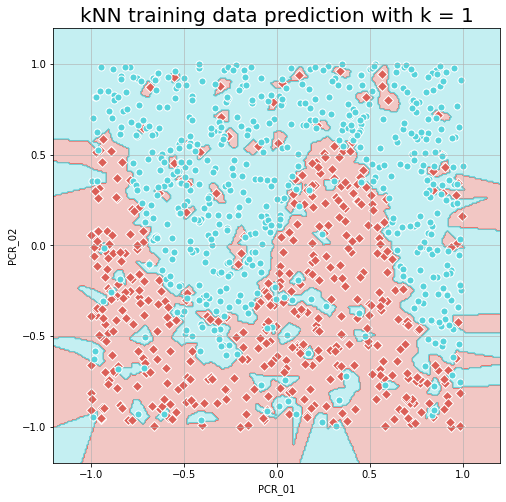

In [10]:
from sklearn.neighbors import KNeighborsClassifier

X_train = pd.DataFrame(temp_df, columns=["PCR_01", "PCR_02"])
y_train = pd.DataFrame(temp_df, columns=["spread"])

h = KNeighborsClassifier(n_neighbors=1)
h.fit(X=X_train.values, y=y_train.values.ravel())

visualize_clf(h, X_train, y_train, 'kNN training data prediction with k = 1', 'PCR_01', 'PCR_02')

# Model selection

**Question 3**

In [11]:
from sklearn.model_selection import cross_validate
k_list = list(range(1, 20, 2)) + list(range(20, 871, 85))
cv_train_list = []
cv_test_list = []

for k in k_list:
  current_kNN_model = KNeighborsClassifier(n_neighbors=k)
  cv_results = cross_validate(current_kNN_model, X_train, y_train.values.ravel(), cv=8, return_train_score=True)
  cv_train_list.append( cv_results['train_score'].mean() )
  cv_test_list.append( cv_results['test_score'].mean() )

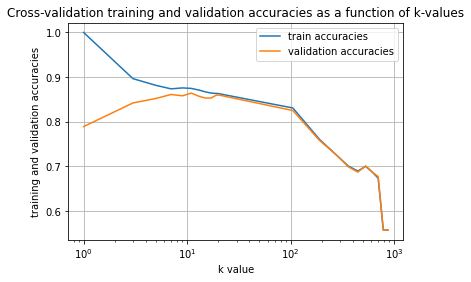

In [12]:
plt.plot(k_list, cv_train_list, label = 'train accuracies')
plt.plot(k_list, cv_test_list, label = 'validation accuracies')
plt.title("Cross-validation training and validation accuracies as a function of k-values")
plt.grid()
plt.xlabel("k value")
plt.ylabel("training and validation accuracies")
plt.semilogx()
plt.legend()
plt.show()

In [13]:
best_k_index = cv_test_list.index(max(cv_test_list))
best_k = k_list[best_k_index]
print("The k that got the best cross-validation test score is:", best_k)
print("Its mean training accuracies is:", cv_train_list[best_k_index])
print("Its mean validation accuracies is:", cv_test_list[best_k_index])

The k that got the best cross-validation test score is: 11
Its mean training accuracies is: 0.8745714285714286
Its mean validation accuracies is: 0.864


In [14]:
for index,k in enumerate(k_list):
  print("k-", k, ": value-", cv_test_list[index])

k- 1 : value- 0.789
k- 3 : value- 0.842
k- 5 : value- 0.852
k- 7 : value- 0.861
k- 9 : value- 0.858
k- 11 : value- 0.864
k- 13 : value- 0.857
k- 15 : value- 0.853
k- 17 : value- 0.853
k- 19 : value- 0.859
k- 20 : value- 0.8600000000000001
k- 105 : value- 0.8250000000000001
k- 190 : value- 0.758
k- 275 : value- 0.726
k- 360 : value- 0.699
k- 445 : value- 0.6869999999999999
k- 530 : value- 0.701
k- 615 : value- 0.6869999999999999
k- 700 : value- 0.6769999999999999
k- 785 : value- 0.557
k- 870 : value- 0.557


**Question 4**

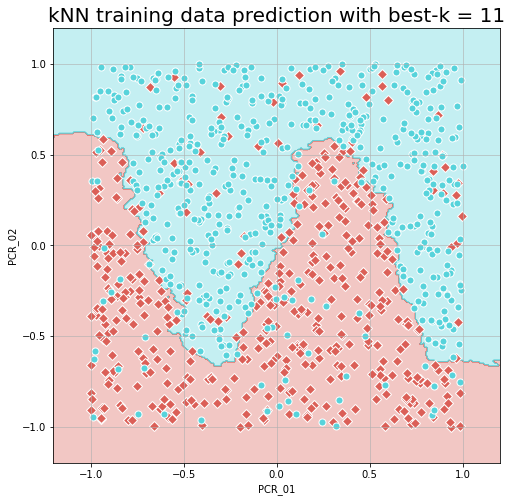

In [15]:
from sklearn.neighbors import KNeighborsClassifier

X_train = pd.DataFrame(temp_df, columns=["PCR_01", "PCR_02"])
y_train = pd.DataFrame(temp_df, columns=["spread"])

h = KNeighborsClassifier(n_neighbors=best_k)
h.fit(X=X_train.values, y=y_train.values.ravel())

title = 'kNN training data prediction with best-k = ' + str(best_k)
visualize_clf(h, X_train, y_train, title, 'PCR_01', 'PCR_02')

In [16]:
temp_test_df = pd.DataFrame(test, columns=["PCR_01", "PCR_02"])

In [17]:
test_prediction = h.predict(temp_test_df.values)
right_answers_amount = 0

for index,spread in enumerate(test["spread"]):
  if spread == test_prediction[index]:
    right_answers_amount += 1

test_acc = right_answers_amount / len(test_prediction)
print("Test accuracy:", test_acc)

Test accuracy: 0.896


**Question 5**

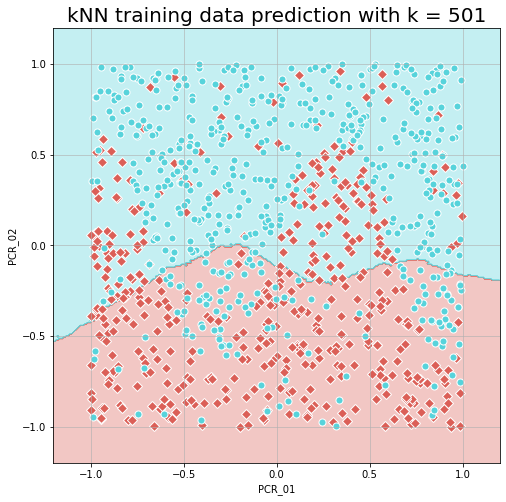

In [18]:
from sklearn.neighbors import KNeighborsClassifier

X_train = pd.DataFrame(temp_df, columns=["PCR_01", "PCR_02"])
y_train = pd.DataFrame(temp_df, columns=["spread"])

h = KNeighborsClassifier(n_neighbors=501)
h.fit(X=X_train.values, y=y_train.values.ravel())

visualize_clf(h, X_train, y_train, 'kNN training data prediction with k = 501', 'PCR_01', 'PCR_02')

**Question 6**

In [52]:
from sklearn.model_selection import cross_validate
k_list = list(range(1, 20, 2)) + list(range(20, 871, 85))
cv_train_all_features_list = []
cv_test_all_features_list = []

X_train_all_features = train.drop('spread', inplace=False, axis=1).drop('risk', inplace=False, axis=1)
y_train = pd.DataFrame(temp_df, columns=["spread"])

for k in k_list:
  current_kNN_model = KNeighborsClassifier(n_neighbors=k)
  cv_results = cross_validate(current_kNN_model, X_train_all_features, y_train.values.ravel(), cv=8, return_train_score=True)
  cv_train_all_features_list.append( cv_results['train_score'].mean() )
  cv_test_all_features_list.append( cv_results['test_score'].mean() )

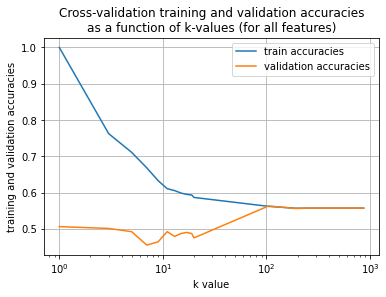

In [53]:
plt.plot(k_list, cv_train_all_features_list, label = 'train accuracies')
plt.plot(k_list, cv_test_all_features_list, label = 'validation accuracies')
plt.title("Cross-validation training and validation accuracies\nas a function of k-values (for all features)")
plt.grid()
plt.xlabel("k value")
plt.ylabel("training and validation accuracies")
plt.semilogx()
plt.legend()
plt.show()

# **Part 2: Decision trees**

# Visualization

**Question 7**

In [21]:
from sklearn.tree import DecisionTreeClassifier

y_train_risk = pd.DataFrame(temp_df, columns=["risk"])

tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree_model = tree_model.fit(X_train_all_features, y_train_risk)

In [22]:
def get_accuracy(model, X_to_predict, real_y):
  prediction = model.predict(X_to_predict)
  right_answers_amount = 0

  for index,risk in enumerate(real_y.to_numpy()):
    if risk == prediction[index]:
      right_answers_amount += 1

  test_acc = right_answers_amount / len(prediction)
  print("Accuracy:", test_acc)

In [23]:
get_accuracy(tree_model, X_train_all_features, y_train_risk)
# tree_model.score(X_train_all_features, y_train_risk)

Accuracy: 0.802


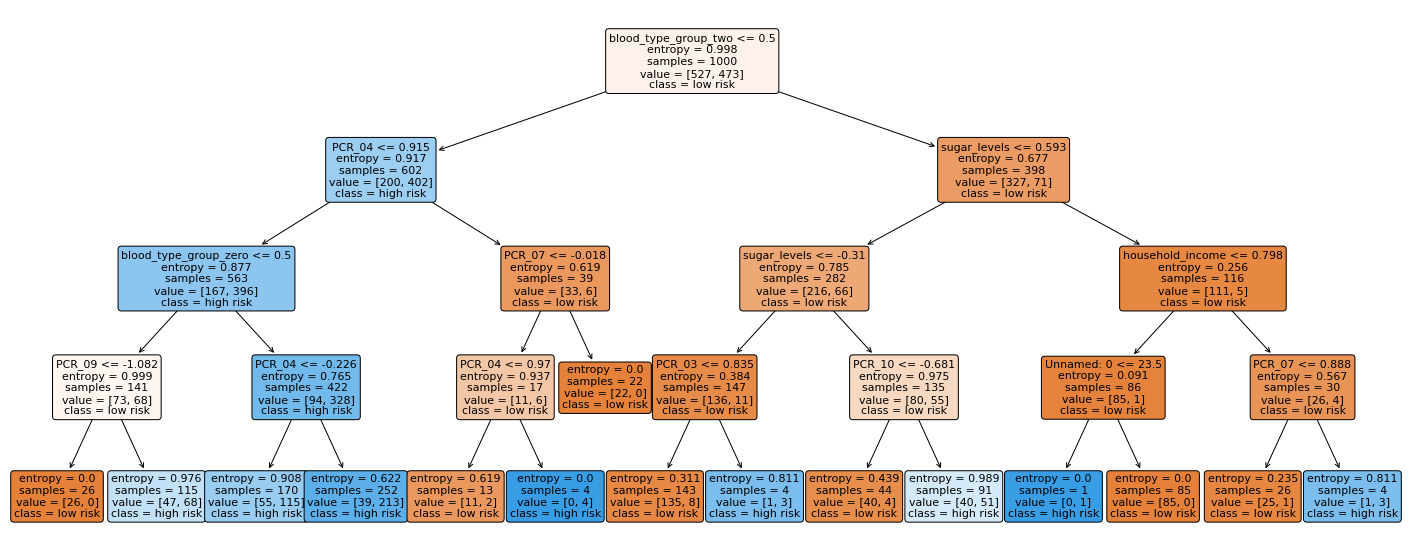

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
plot_tree(tree_model, fontsize=11, feature_names=X_train_all_features.columns, class_names=["low risk", "high risk"], filled=True, rounded=True)
plt.show()

# Model selection

**Question 8**

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# parameters = {'max_depth': range(2, 20, 2), 'min_samples_leaf': range(5, 30, 5)} ## formal chosen range
parameters = {'max_depth': [4,5,6,7,8,9,10,15,20], 'min_samples_leaf': [2,5,10,15,20,25,30]} ## practical focused range
adjustable_tree_model = DecisionTreeClassifier(criterion="entropy")
grid_search = GridSearchCV(adjustable_tree_model, parameters, cv=8, return_train_score=True)
grid_search.fit(X_train_all_features, y_train_risk)
grid_search_results = pd.DataFrame(grid_search.cv_results_)

In [27]:
print("best parameters score:", grid_search.best_score_)

best parameters score: 0.8400000000000001


In [28]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 20}


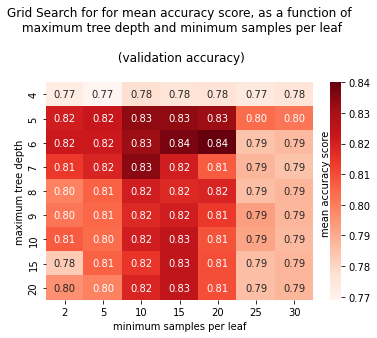

In [29]:
sns.heatmap( grid_search_results.pivot("param_max_depth", "param_min_samples_leaf", "mean_test_score"), cmap="Reds", annot=True, fmt=".2f" )
plt.title("Grid Search for for mean accuracy score, as a function of\n maximum tree depth and minimum samples per leaf\n\n (validation accuracy)\n")
plt.xlabel("minimum samples per leaf")
plt.ylabel("maximum tree depth")
plt.text(7.2,6.3,"mean accuracy score", rotation = 'vertical')
plt.show()

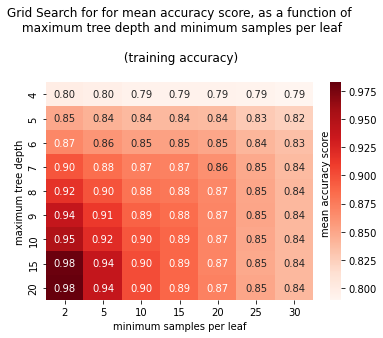

In [30]:
sns.heatmap( grid_search_results.pivot("param_max_depth", "param_min_samples_leaf", "mean_train_score"), cmap="Reds", annot=True, fmt=".2f" )
plt.title("Grid Search for for mean accuracy score, as a function of\n maximum tree depth and minimum samples per leaf\n\n (training accuracy)\n")
plt.xlabel("minimum samples per leaf")
plt.ylabel("maximum tree depth")
plt.text(7.2,6.3,"mean accuracy score", rotation = 'vertical')
plt.show()

**Question 9**

In [31]:
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

best_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
best_tree_model = best_tree_model.fit(X_train_all_features, y_train_risk)

X_test_all_features = test.drop('spread', inplace=False, axis=1).drop('risk', inplace=False, axis=1)
y_test_risk = test["risk"]
get_accuracy(best_tree_model, X_test_all_features, y_test_risk)

Accuracy: 0.852


# **Part 3: Linear SVM and the Polynomial kernel**


# Implementation of the loss and its gradient

**Task:** Copy the SoftSVM module from the given SoftSVM.py into your notebook / project

**Task:** Complete the (static) SoftSVM.loss method in the module, so that it computes the
objective loss 𝑝𝐶
(𝑤, 𝑏) on a given dataset.

In [32]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        hinge_vector = 1 - hinge_inputs
        v_sum = np.sum( np.maximum(0, hinge_vector) )
        loss = norm ** 2 + C * v_sum

        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        margins = (X.dot(w) + b)
        hinge_inputs = np.sign(np.multiply(margins, y) - 1)
        hinge_inputs[hinge_inputs == 1] = 0

        sign_vector = np.multiply(hinge_inputs, y)  # hinge_inputs==f_vector
        x_dot_y = np.transpose(np.multiply(np.transpose(X), sign_vector))
        x_sum = np.sum(x_dot_y, axis=0)

        g_w = (2 * w) + (C * x_sum)
        g_b = C * np.sum(sign_vector)

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]
        
        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = SoftSVM.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - (self.lr * g_w)
            self.b = self.b - (self.lr * g_b)

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = np.sign(np.dot(X, self.w) + b)

        return y_pred


# Verifying your implementation: Numerical vs. analytical gradients

**Task:** Copy the functions from the given verify_gradients.py into your notebook / project.

In [35]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


**Question 10**

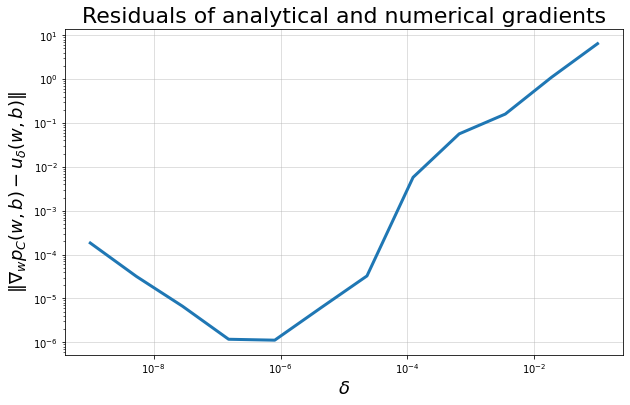

In [36]:
X_train = pd.DataFrame(train, columns=["PCR_01", "PCR_02"]).values
y_train = np.array(train["spread"])
compare_gradients(X_train, y_train, deltas=np.logspace(-9, -1, 12))

# **Solving Soft SVM problems using Stochastic Gradient Descent (SGD)**

**Task:** Plot the graphs for the learning rates in np.logspace(-3, 0, 4) without changing the C value given below.

In [37]:
np.logspace(-3, 0, 4)

array([0.001, 0.01 , 0.1  , 1.   ])

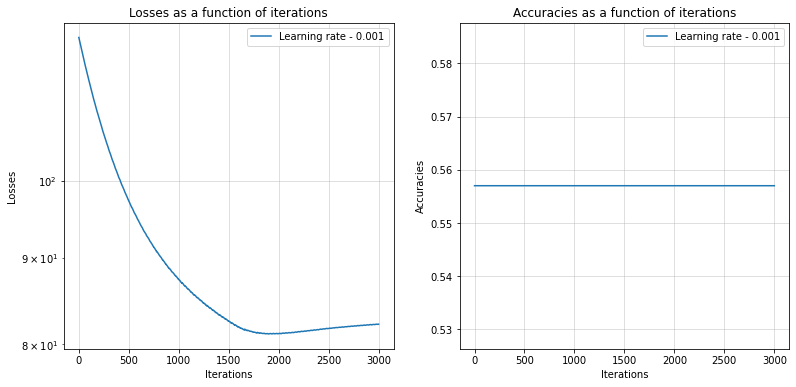

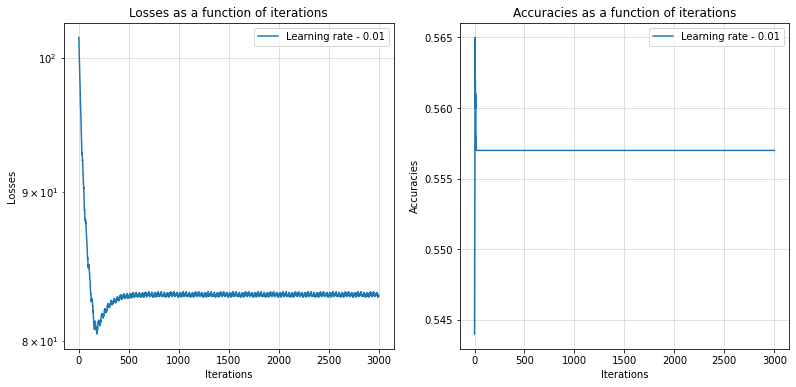

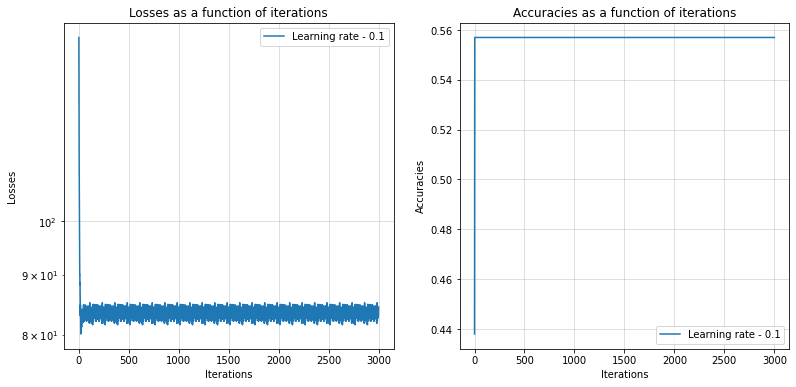

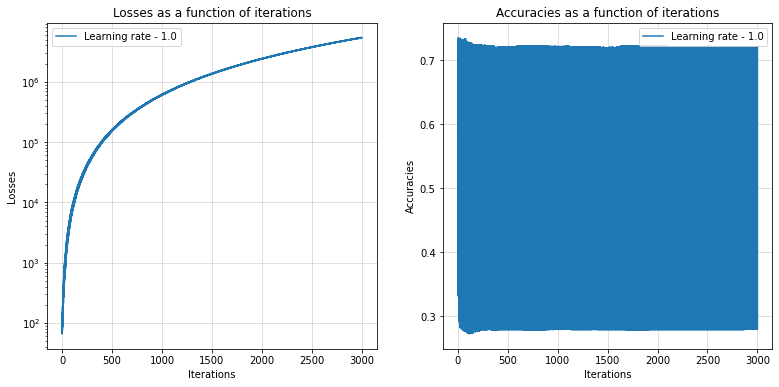

In [58]:
lr_values = np.logspace(-3, 0, 4)
X_train = np.array(train[["PCR_01", "PCR_02"]])
y_train = np.array(train["spread"])

for lr_value in lr_values:
  clf = SoftSVM(C=0.1, lr=lr_value)
  losses, accuracies = clf.fit_with_logs(X_train, y_train, max_iter=3000)
  plt.figure(figsize=(13, 6))
  current_label = "Learning rate - " + str(lr_value)
  plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Losses as a function of iterations")
  plt.semilogy(losses, label=current_label), plt.xlabel("Iterations"), plt.ylabel("Losses"), plt.legend()
  plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Accuracies as a function of iterations")
  plt.plot(accuracies, label=current_label), plt.xlabel("Iterations"), plt.ylabel("Accuracies"), plt.legend()

0.704


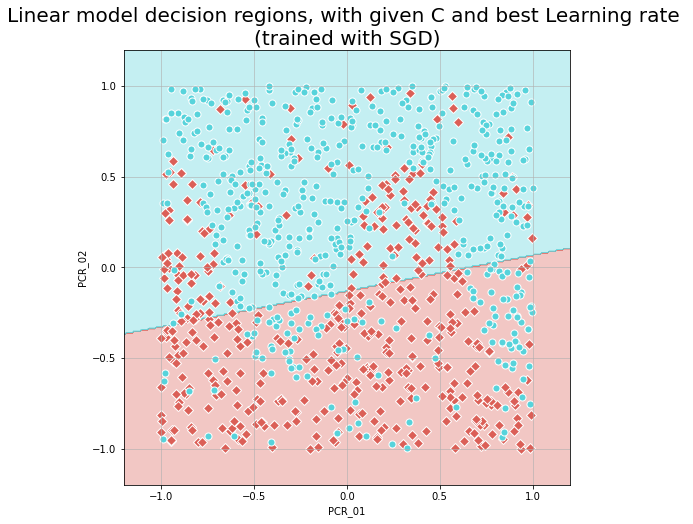

In [39]:
best_learning_rate = 0.01
X_train = pd.DataFrame(train, columns=["PCR_01", "PCR_02"]).values
y_train = np.array(train["spread"])
clf = SoftSVM(C=90, lr=best_learning_rate)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
visualize_clf(clf, X_train, y_train, "Linear model decision regions, with given C and best Learning rate \n(trained with SGD)", "PCR_01", "PCR_02")

In [40]:
train["spread"].value_counts()

 1    557
-1    443
Name: spread, dtype: int64

In [41]:
mone1 = train[train.PCR_02 < 0][train.spread == -1].shape[0]
mone2 = train[train.PCR_02 > 0][train.spread == 1].shape[0]
(mone1+mone2)/(train.shape[0])

<ipython-input-41-5b3cb265df53>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mone1 = train[train.PCR_02 < 0][train.spread == -1].shape[0]
<ipython-input-41-5b3cb265df53>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mone2 = train[train.PCR_02 > 0][train.spread == 1].shape[0]


0.712

# **Using a feature mapping**

**Question 12**

Train accuracy: 0.679
Test accuracy: 0.652


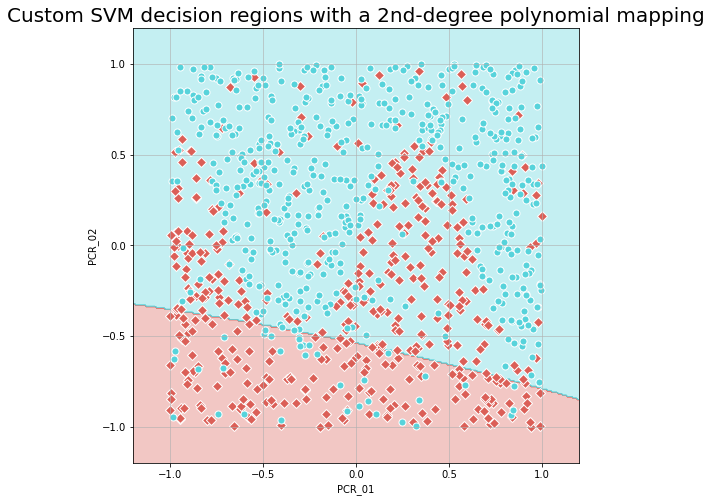

In [42]:
C = 1e13
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=2)),
                    ('scaler', StandardScaler()),
                    ('SVM', SoftSVM(C=C, lr=(1/(C*5e2))))])


X_train = pd.DataFrame(train, columns=["PCR_01", "PCR_02"]).values
y_train = np.array(train["spread"])

X_test = pd.DataFrame(test, columns=["PCR_01", "PCR_02"]).values
y_test = np.array(test["spread"])

svm_clf.fit(X_train, y_train, SVM__max_iter=10000)

print("Train accuracy:", svm_clf.score(X_train, y_train))
print("Test accuracy:", svm_clf.score(X_test, y_test))

visualize_clf(svm_clf, X_train, y_train, "Custom SVM decision regions with a 2nd-degree polynomial mapping", "PCR_01", "PCR_02")

Train accuracy: 0.754
Test accuracy: 0.768


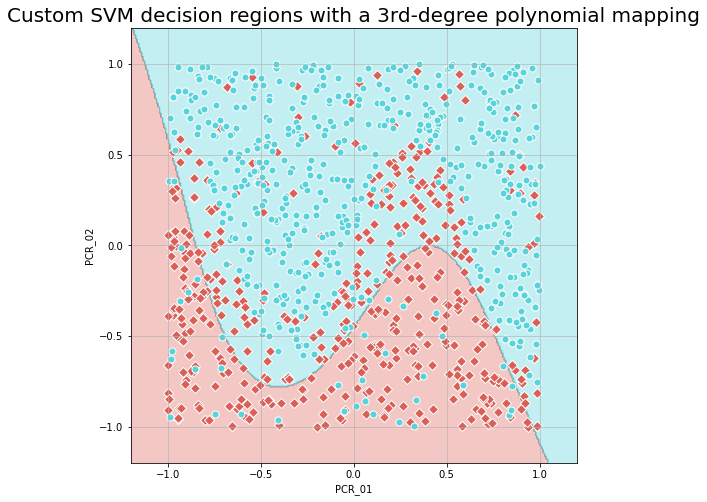

In [43]:
svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)),
                    ('scaler', StandardScaler()),
                    ('SVM', SoftSVM(C=C, lr=(1/(C*5e2))))])
svm_clf.fit(X_train, y_train, SVM__max_iter=10000)

print("Train accuracy:", svm_clf.score(X_train, y_train))
print("Test accuracy:", svm_clf.score(X_test, y_test))

visualize_clf(svm_clf, X_train, y_train, "Custom SVM decision regions with a 3rd-degree polynomial mapping", "PCR_01", "PCR_02")

**Question 13**

Train accuracy for iteration 1 : 0.753


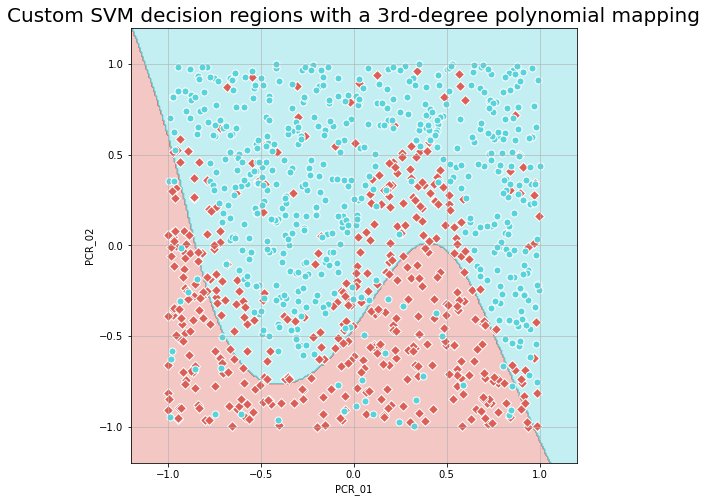



Train accuracy for iteration 2 : 0.756


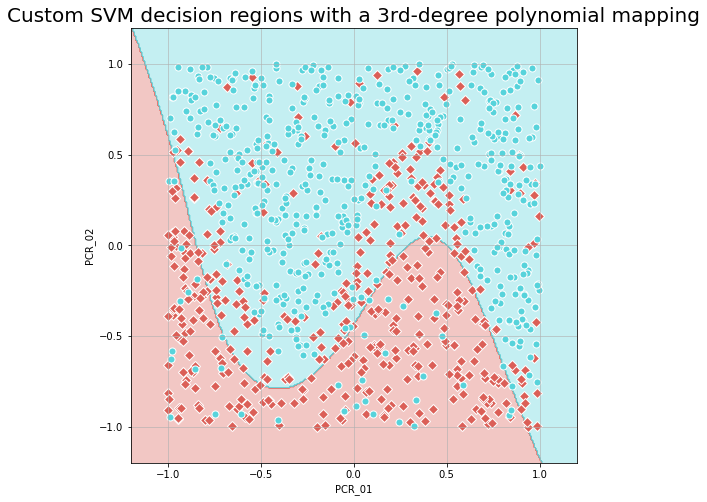



Train accuracy for iteration 3 : 0.752


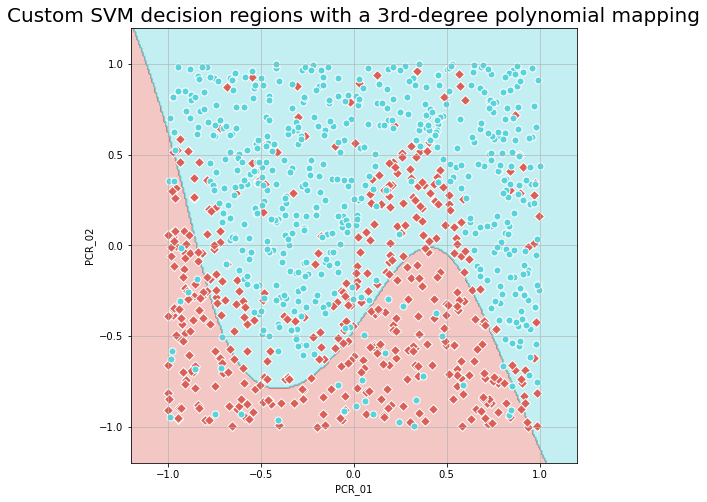



Train accuracy for iteration 4 : 0.754


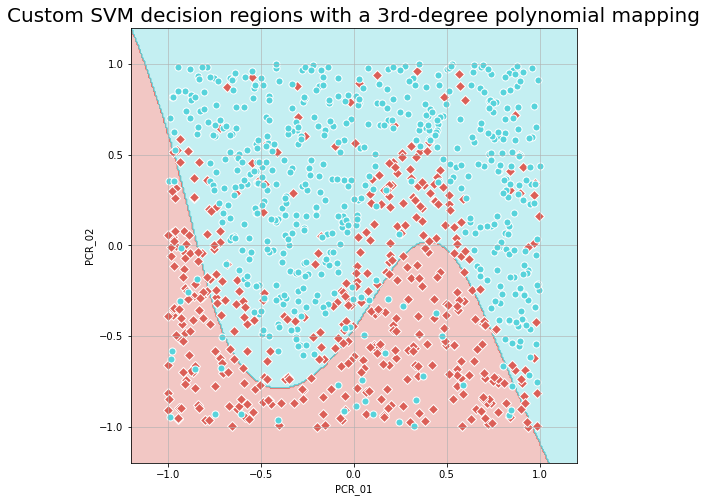



Train accuracy for iteration 5 : 0.757


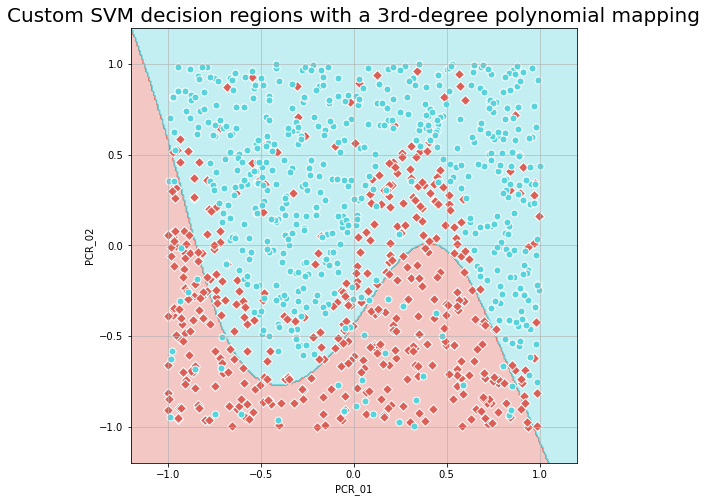



Train accuracy mean is: 0.7544000000000001 

Train accuracy standard deviation is:  0.0018547236990991425


In [44]:
C = 1e13

train_accuracy_list = []
for i in range(5):
  svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)),
                      ('scaler', StandardScaler()),
                      ('SVM', SoftSVM(C=C, lr=(1/(C*5e2))))])
  svm_clf.fit(X_train, y_train, SVM__max_iter=10000)
  train_accuracy_list.append(svm_clf.score(X_train, y_train))
  print("Train accuracy for iteration", i + 1, ":", train_accuracy_list[i])
  visualize_clf(svm_clf, X_train, y_train, "Custom SVM decision regions with a 3rd-degree polynomial mapping", "PCR_01", "PCR_02")
  print("\n")

print("Train accuracy mean is:", np.mean(train_accuracy_list), "\n")
print("Train accuracy standard deviation is: ", np.std(train_accuracy_list))


# **Part 4: The RBF kernel**

**Task (and Question 15):** Use sklearn.svm.SVC to train an SVM with an RBF kernel on the two features and the
spread variable.

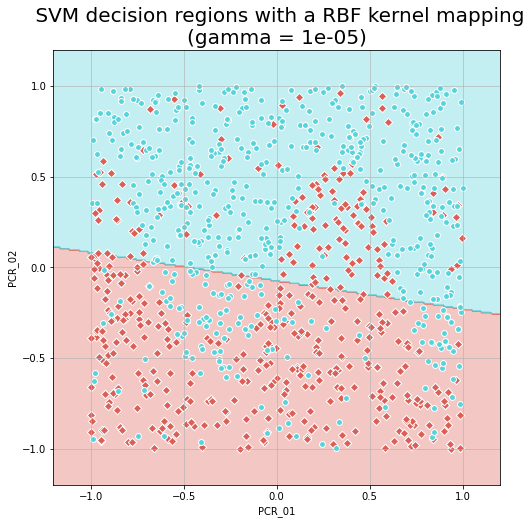

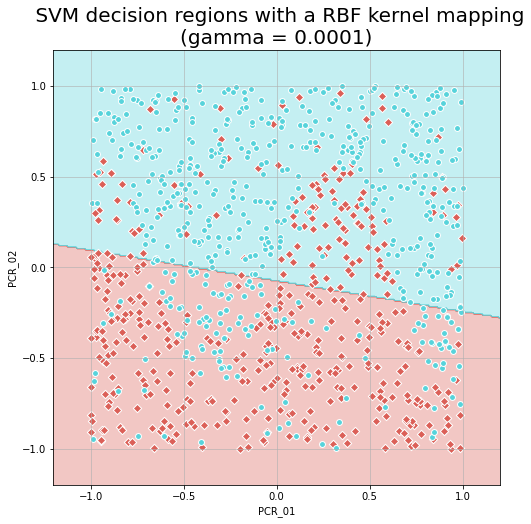

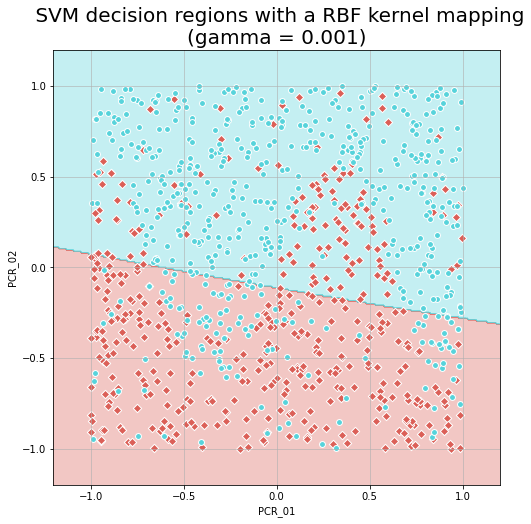

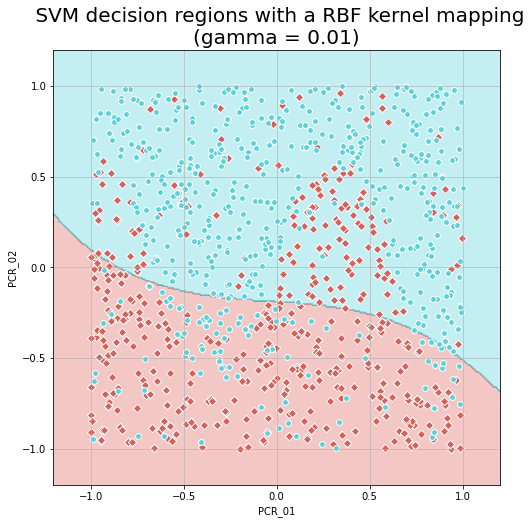

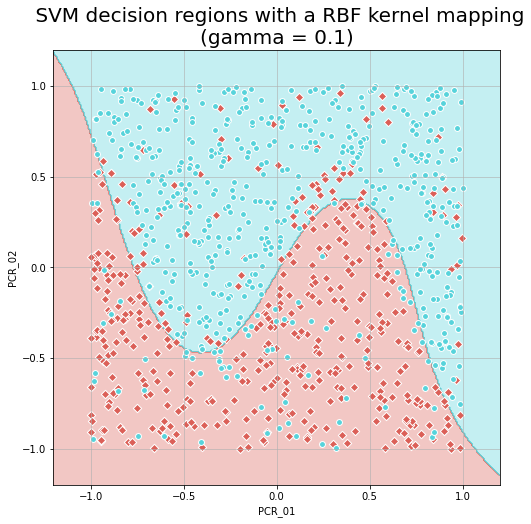

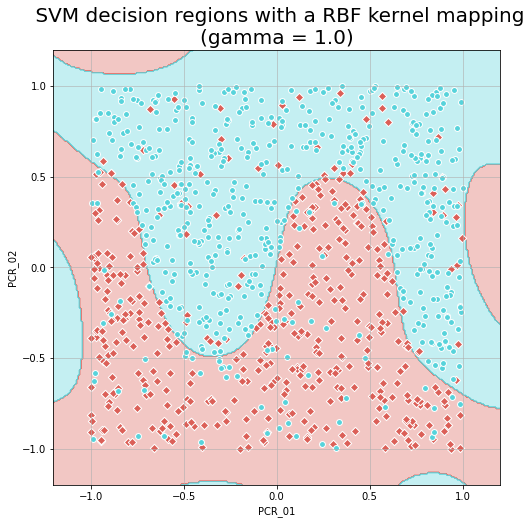

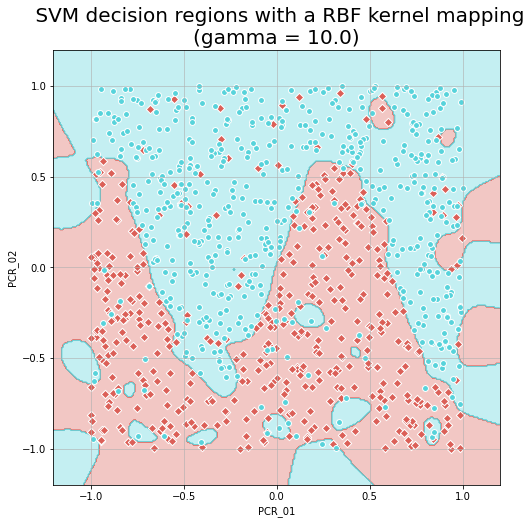

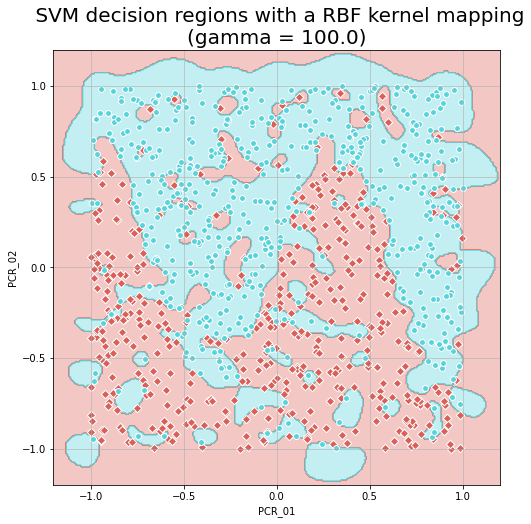

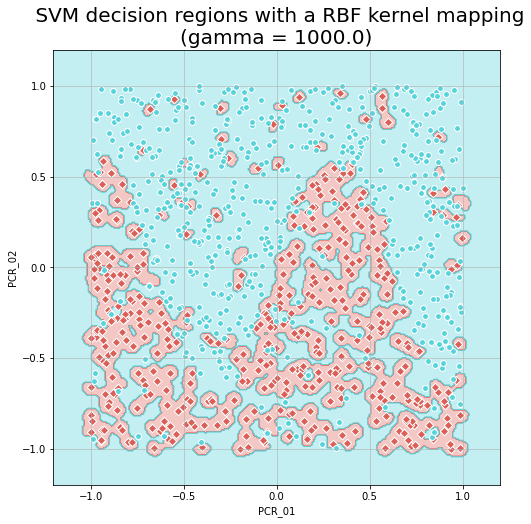

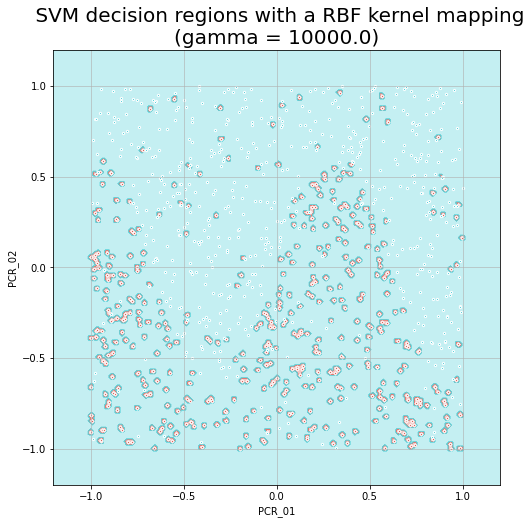

In [45]:
from sklearn.svm import SVC
gammas = np.logspace(-5, 4, 10)

X_train = pd.DataFrame(train, columns=["PCR_01", "PCR_02"]).values
y_train = np.array(train["spread"])

m_size = 35

for current_gamma in gammas:
  svc = SVC(C=1e4, kernel='rbf', gamma=current_gamma)
  svc.fit(X_train, y_train)
  if current_gamma == 1e4:
    m_size = 5 
  visualize_clf(svc, X_train, y_train, " SVM decision regions with a RBF kernel mapping\n(gamma = "
    + str(current_gamma) + ")", "PCR_01", "PCR_02", marker_size = m_size)

**Question 17**

In [46]:
svc_train_list = []
svc_test_list = []

for current_gamma in gammas:
  svc = SVC(C=1e4, kernel='rbf', gamma=current_gamma)
  cv_results = cross_validate(svc, X_train, y_train, cv=8, return_train_score=True)
  svc_train_list.append( cv_results['train_score'].mean() )
  svc_test_list.append( cv_results['test_score'].mean() )

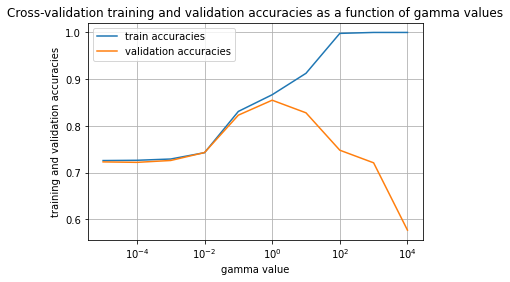

In [47]:
plt.plot(gammas, svc_train_list, label = 'train accuracies')
plt.plot(gammas, svc_test_list, label = 'validation accuracies')
plt.title("Cross-validation training and validation accuracies as a function of gamma values")
plt.grid()
plt.xlabel("gamma value")
plt.ylabel("training and validation accuracies")
plt.semilogx()
plt.legend()
plt.show()

In [48]:
best_gamma_index = svc_test_list.index(max(svc_test_list))
best_gamma = gammas[best_gamma_index]
print("The gamma that got the best cross-validation test score is:", best_gamma)
print("Its mean training accuracies is:", svc_train_list[best_gamma_index])
print("Its mean validation accuracies is:", svc_test_list[best_gamma_index])

The gamma that got the best cross-validation test score is: 1.0
Its mean training accuracies is: 0.8667142857142857
Its mean validation accuracies is: 0.855


**Question 18**

In [49]:
best_svc = SVC(C=1e4, kernel='rbf', gamma=best_gamma)
best_svc.fit(X_train, y_train)

SVC(C=10000.0, gamma=1.0)

In [50]:
X_test = pd.DataFrame(test, columns=["PCR_01", "PCR_02"]).values
y_test = np.array(test["spread"])
print( "SVM with a RBF kernel mapping test accuracy:", best_svc.score(X_test, y_test) )

SVM with a RBF kernel mapping test accuracy: 0.9


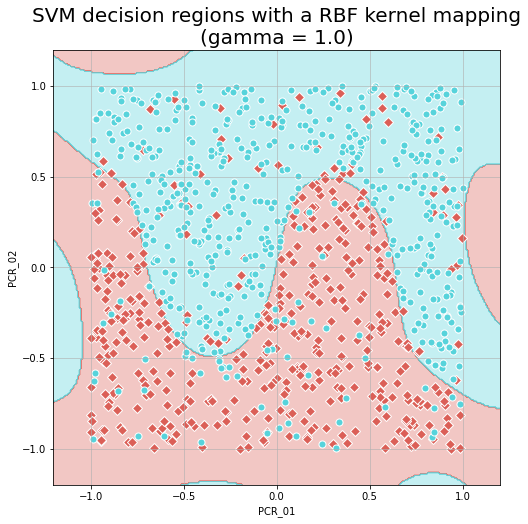

In [51]:
title = 'SVM decision regions with a RBF kernel mapping\n(gamma = ' + str(best_gamma) + ')'
visualize_clf(best_svc, X_train, y_train, title, 'PCR_01', 'PCR_02')